**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Fall 2021; Prof. V. F. de Almeida

# Title
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\fluxc}{\boldsymbol{q}_\text{c}}
  \newcommand{\fluxf}{\boldsymbol{q}_\text{f}}
  \newcommand{\velocity}{\boldsymbol{v}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\xpoint}{\boldsymbol{x}}
  \newcommand{\Tc}{T_\text{c}}
  \newcommand{\wc}{w_\text{c}}
  \newcommand{\Tf}{T_\text{f}}
  \newcommand{\wf}{w_\text{f}}
  \newcommand{\wI}{w_\text{I}}
  \newcommand{\Ri}{R_\text{i}}
  \newcommand{\Ro}{R_\text{o}}
  \newcommand{\Omegac}{\Omega_\text{c}}
  \newcommand{\Omegaf}{\Omega_\text{f}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\div}{div}
  \DeclareMathOperator{\gradx}{grad_\xpoint}
  \DeclareMathOperator{\divx}{div_\xpoint}
  \DeclareMathOperator{\grad}{grad}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  `your name(s)` <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor and Collaborator:** `Prof. name`

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**22Nov2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Tests](#tests)
 + [Setup](#setup)
   - [Test 1: Bare fuel plate](#1dsolofueldirichlet)
   - [Test 2: Fuel plate w/ reflector](#1dsolofueldirichletrobin)
* [2-D Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

`text goes here`

## [Problem Statement](#toc)<a id="problem"></a>

`mathematical statement of problem`


### Domain
`describe domain`

## [Objectives](#toc)<a id="obj"></a>

`state objectives`

## [Approach](#toc)<a id="app"></a>

A Galerkin weak formulation follows below and the implementation of the integrands as MOOSE kernels are described next.

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 


### [MOOSE Kernels](#toc)<a id="kernels"></a>


### [Tests](#toc)<a id="tests"></a>


### [Setup](#toc)<a id="setup"></a>

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter

In [2]:
'''Plot function for FEM Solution'''
def plot_solution(df1=None, df2=None, 
                  x_scale=1,
                  y1_scale=1,
                  normalize_y1=False,
                  y2_scale=1,
                  xlabel=r'$x$ []',
                  y1label=r'$u_h(x)$ []',
                  y2label=r'$q_h(x)$ []',
                  df3=None,
                  title='No Title', 
                  u1_legend='no u1 legend',
                  u2_legend='no u2 legend',
                  u1_flux_legend='no u1 flux legend',
                  u2_flux_legend='no u2 flux legend'):
    '''Plot solution for fuel and reflector
    '''
    import matplotlib.pyplot as plt
    #%matplotlib inline
    plt.style.use('dark_background')
    import numpy as np

    (fig, ax1) = plt.subplots(1, figsize=(15, 6))

    if df1 is not None:
        if normalize_y1:
            if df2 is not None:
                uFuel_scaled = df1['uFuel']-df2['uReflector'].iloc[-1]
            else:
                uFuel_scaled = df1['uFuel']-df1['uFuel'].iloc[-1]
            y1_scale = 1/uFuel_scaled[0]
            ax1.plot(df1['x']*x_scale, uFuel_scaled*y1_scale, 'r*-', label=u1_legend)
        else:
            ax1.plot(df1['x']*x_scale, df1['uFuel']*y1_scale, 'r*-', label=u1_legend)
    if df2 is not None:
        if normalize_y1:
            uReflector_scaled = df2['uReflector']-df2['uReflector'].iloc[-1]
            ax1.plot(df2['x']*x_scale, uReflector_scaled*y1_scale, '*--', color='magenta', label=u2_legend)
        else:
            ax1.plot(df2['x']*x_scale, df2['uReflector']*y1_scale, '*--', color='magenta', label=u2_legend)

    ax1.set_xlabel(xlabel, fontsize=18)
    ax1.set_ylabel(y1label, fontsize=18, color='white')
    ax1.tick_params(axis='y', labelcolor='white', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='center left', fontsize=12)
    #ax1.set_ylim(0,1)
    #ax1.set_xscale('log')
    #ax1.set_yscale('log')
    ax1.grid(True)
    
    ax2 = None

    if df1 is not None and 'diffFluxFuel_x' in df1.columns:
        ax2 = ax1.twinx()
        ax2.plot(df1['x']*x_scale, df1['diffFluxFuel_x']*y2_scale,'*-', 
                 color='yellow', label=u1_flux_legend)
        
    if df2 is not None and 'diffFluxReflector_x' in df2.columns:
        if ax2 is None:
            ax2 = ax1.twinx()
            
        ax2.plot(df2['x']*x_scale, df2['diffFluxReflector_x']*y2_scale,'*--', 
                 color='orange', label=u2_flux_legend)

    if ax2 is not None:
        ax2.set_ylabel(y2label, fontsize=16, color='white')
        ax2.tick_params(axis='y', labelcolor='white', labelsize=14)
        ax2.legend(loc='upper right', fontsize=12)
        #ax2.set_yscale('log')
        #ax2.set_ylim(0,2)
        #ax2.grid(True)

    plt.title(title, fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

In [3]:
'''Domain'''
x_a = 0*unit.cm
plate_thickness = 25*unit.cm

In [4]:
'''Parameters'''
import math
diff_coeff_fuel = 1.0
buckling = 2.0322e-2/unit.cm

x_b = plate_thickness
extrapolation_delta = 1/5*plate_thickness

In [5]:
'''Data (boundary conditions for testing purposes)'''
dirichlet_bc = False
dirichlet_value = 1e-10/unit.cm**2/unit.second

In [6]:
'''FEM Solution'''
n_felem_fuel = 5

order = 'second'
flux_order = 'first'

fdp_full = True
n_plot_pts_fuel = 2*n_felem_fuel + 1

In [7]:
def write_input_file(with_reflector=False, dirichlet_bc=True, pjfnk=False):
    import pyhit
    import moosetree
    root = pyhit.load('')
    
    prblm = root.insert(-1,'Problem')
    prblm['type'] = 'FEProblem'
    prblm['coord_type'] = 'XYZ'

    mesh = root.insert(-1,'Mesh')
    
    omega1 = mesh.insert(-1,'omega1')
    omega1['type'] = 'GeneratedMeshGenerator'
    omega1['dim'] = 1
    omega1['xmin'] = x_a
    omega1['xmax'] = plate_thickness/2.0
    omega1['nx'] = n_felem_fuel
    if order == 'second':
        omega1['elem_type'] = 'edge3'

    if not with_reflector:
        mod1 = mesh.insert(-1,'mod1')
        mod1['type'] = 'SubdomainBoundingBoxGenerator'
        mod1['input'] = 'omega1'
        mod1['block_id'] = 1
        mod1['block_name'] = 'omega_1'
        mod1['bottom_left'] = str(x_a)+' 0 0'
        mod1['top_right'] = str(plate_thickness/2.0)+' 1 0'
    
    if with_reflector:
        omega2 = mesh.insert(-1,'omega2')
        omega2['type'] = 'GeneratedMeshGenerator'
        omega2['dim'] = 1
        omega2['xmin'] = plate_thickness/2.0
        omega2['xmax'] = x_b
        omega2['nx'] = n_felem_reflector
        if order == 'second':
            omega2['elem_type'] = 'edge3'

        omega = mesh.insert(-1,'omega')
        omega['type'] = 'StitchedMeshGenerator'
        omega['inputs'] = "'omega1 omega2'"
        omega['stitch_boundaries_pairs'] = "'right left'"
        omega['clear_stitched_boundary_ids'] = 'true'
    
        mod1 = mesh.insert(-1,'mod1')
        mod1['type'] = 'SubdomainBoundingBoxGenerator'
        mod1['input'] = 'omega'
        mod1['block_id'] = 1
        mod1['block_name'] = 'omega_1'
        mod1['bottom_left'] = str(x_a)+' 0 0'
        mod1['top_right'] = str(plate_thickness/2.0)+' 1 0'
    
        mod2 = mesh.insert(-1,'mod2')
        mod2['type'] = 'SubdomainBoundingBoxGenerator'
        mod2['input'] = 'mod1'
        mod2['block_id'] = 2
        mod2['block_name'] = 'omega_2'
        mod2['bottom_left'] = str(plate_thickness/2.0)+' 0 0'
        mod2['top_right'] = str(x_b)+' 1 0'
    
        mod3 = mesh.insert(-1,'mod3')
        mod3['type'] = 'SideSetsBetweenSubdomainsGenerator'
        mod3['input'] = 'mod2'
        mod3['primary_block'] = 'omega_1'
        mod3['paired_block'] = 'omega_2' 
        mod3['new_boundary'] = 'interface_12'
    
        mod4 = mesh.insert(-1,'mod4')
        mod4['type'] = 'SideSetsAroundSubdomainGenerator'
        mod4['input'] = 'mod3'
        mod4['block'] = 'omega_1'
        mod4['normal'] = '-1 0 0'
        mod4['new_boundary'] = 'left'
    
        mod5 = mesh.insert(-1,'mod5')
        mod5['type'] = 'SideSetsAroundSubdomainGenerator'
        mod5['input'] = 'mod4'
        mod5['block'] = 'omega_2'
        mod5['normal'] = '1 0 0'
        mod5['new_boundary'] = 'right'

    vars = root.insert(-1,'Variables')
    
    fuel = vars.insert(-1,'uFuel')
    fuel['block'] = 'omega_1'
    fuel['order'] = order
    fuel['family'] = 'lagrange'
    fuel['initial_condition'] = 10
    
    if with_reflector:
        reflector = vars.insert(-1,'uReflector')
        reflector['block'] = 'omega_2'
        reflector['order'] = order
        reflector['family'] = 'lagrange'
        reflector['initial_condition'] = 10
    
    aux_vars = root.insert(-1,'AuxVariables')
    
    diff_flux_fuel = aux_vars.insert(-1,'diffFluxFuel')
    diff_flux_fuel['block'] = 'omega_1'
    diff_flux_fuel['order'] = flux_order
    diff_flux_fuel['family'] = 'monomial_vec'
    
    diff_flux_fuel_x = aux_vars.insert(-1,'diffFluxFuel_x')
    diff_flux_fuel_x['block'] = 'omega_1'
    diff_flux_fuel_x['order'] = flux_order
    diff_flux_fuel_x['family'] = 'monomial'
    
    if with_reflector:
        diff_flux_reflector = aux_vars.insert(-1,'diffFluxReflector')
        diff_flux_reflector['block'] = 'omega_2'
        diff_flux_reflector['order'] = flux_order
        diff_flux_reflector['family'] = 'monomial_vec'
    
        diff_flux_reflector_x = aux_vars.insert(-1,'diffFluxReflector_x')
        diff_flux_reflector_x['block'] = 'omega_2'
        diff_flux_reflector_x['order'] = flux_order
        diff_flux_reflector_x['family'] = 'monomial'

    kernels = root.insert(-1,'Kernels')
    
    diff_fuel = kernels.insert(-1,'diffusion-fuel')
    diff_fuel['type'] = 'DiffusionTerm'
    diff_fuel['block'] = 'omega_1'
    diff_fuel['variable'] = 'uFuel'
    diff_fuel['diffCoeff'] = diff_coeff_fuel
    
    source_fuel = kernels.insert(-1,'source-fuel')
    source_fuel['type'] = 'SourceTerm'
    source_fuel['block'] = 'omega_1'
    source_fuel['variable'] = 'uFuel'
    source_fuel['sourceSlope'] = buckling**2
    
    if with_reflector:
        diff_reflector = kernels.insert(-1,'diffusion-reflector')
        diff_reflector['type'] = 'DiffusionTerm'
        diff_reflector['block'] = 'omega_2'
        diff_reflector['variable'] = 'uReflector'
        diff_reflector['diffCoeff'] = diff_coeff_reflector
    
        source_reflector = kernels.insert(-1,'source-reflector')
        source_reflector['type'] = 'SourceTerm'
        source_reflector['block'] = 'omega_2'
        source_reflector['variable'] = 'uReflector'
        source_reflector['sourceSlope'] = - 1/diff_length**2
    
    if with_reflector:
        interf_kernels = root.insert(-1,'InterfaceKernels')
    
        n_flux = interf_kernels.insert(-1,'normal-flux-continuity')
        n_flux['type'] = 'InterfaceNormalFluxContinuity'
        n_flux['variable'] = 'uFuel'
        n_flux['neighbor_var'] = 'uReflector'
        n_flux['boundary'] = 'interface_12'
        n_flux['diffCoeff'] = diff_coeff_fuel
        n_flux['diffCoeffNeighbor'] = diff_coeff_reflector
    
        t_jump = interf_kernels.insert(-1,'u-jump')
        t_jump['type'] = 'InterfaceJump'
        t_jump['variable'] = 'uFuel'
        t_jump['neighbor_var'] = 'uReflector'
        t_jump['boundary'] = 'interface_12'
        t_jump['transferCoeff'] = 1e+10
        t_jump['adsorptionCoeff'] = 0.0
        t_jump['diffCoeff'] = diff_coeff_fuel

    aux_kernels = root.insert(-1,'AuxKernels')
    
    diff_flux_fuel = aux_kernels.insert(-1,'diffusion-flux-fuel')
    diff_flux_fuel['type'] = 'DiffusionFlux'
    diff_flux_fuel['block'] = 'omega_1'
    diff_flux_fuel['field'] = 'uFuel'
    diff_flux_fuel['diffCoeff'] = diff_coeff_fuel
    diff_flux_fuel['variable'] = 'diffFluxFuel'
    diff_flux_fuel['execute_on'] = 'timestep_end'
    
    diff_flux_fuel_x = aux_kernels.insert(-1,'diffusion-flux-fuel-x')
    diff_flux_fuel_x['type'] = 'VectorVariableComponentAux'
    diff_flux_fuel_x['block'] = 'omega_1'
    diff_flux_fuel_x['vector_variable'] = 'diffFluxFuel'
    diff_flux_fuel_x['component'] = 'x'
    diff_flux_fuel_x['variable'] = 'diffFluxFuel_x'
    diff_flux_fuel_x['execute_on'] = 'timestep_end'
    
    if with_reflector:
        diff_flux_reflector = aux_kernels.insert(-1,'diffusion-flux-reflector')
        diff_flux_reflector['type'] = 'DiffusionFlux'
        diff_flux_reflector['block'] = 'omega_2'
        diff_flux_reflector['field'] = 'uReflector'
        diff_flux_reflector['diffCoeff'] = diff_coeff_reflector
        diff_flux_reflector['variable'] = 'diffFluxReflector'
        diff_flux_reflector['execute_on'] = 'timestep_end'
    
        diff_flux_reflector_x = aux_kernels.insert(-1,'diffusion-flux-reflector-x')
        diff_flux_reflector_x['type'] = 'VectorVariableComponentAux'
        diff_flux_reflector_x['block'] = 'omega_2'
        diff_flux_reflector_x['vector_variable'] = 'diffFluxReflector'
        diff_flux_reflector_x['component'] = 'x'
        diff_flux_reflector_x['variable'] = 'diffFluxReflector_x'
        diff_flux_reflector_x['execute_on'] = 'timestep_end'
    
    bcs = root.insert(-1,'BCs')
    
    cl = bcs.insert(-1,'center-line')
    cl['type'] = 'NeumannBC'
    cl['variable'] = 'uFuel'
    cl['boundary'] = 'left'
    cl['value'] = 0 
    
    xb = bcs.insert(-1,'x-b')

    if dirichlet_bc:
        xb['type'] = 'DirichletBC'
        xb['boundary'] = 'right'
        xb['value'] = dirichlet_value
        if with_reflector:
            xb['variable'] = 'uReflector'
        else:
            xb['variable'] = 'uFuel'
    else:
        xb['type'] = 'NormalFluxBC'
        xb['boundary'] = 'right'
        if with_reflector:
            xb['variable'] = 'uReflector'
            xb['transferCoeff'] = diff_coeff_reflector/extrapolation_delta
        else:
            xb['variable'] = 'uFuel'
            xb['transferCoeff'] = diff_coeff_fuel/extrapolation_delta

    if pjfnk:
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'
        exe['solve_type']  = 'PJFNK'
        exe['petsc_options_iname']  = '-pc_type -pc_hypre_type'
        exe['petsc_options_value']  = 'hypre boomeramg'
        exe['l_max_its']  = 20
        exe['l_tol']  = 1e-5
        exe['nl_max_its']  = 15
        exe['nl_rel_tol']  = 1e-8
        exe['nl_abs_tol']  = 1e-8
    elif fdp_full:
        pre = root.insert(-1, 'Preconditioning')
        pre['active'] = 'fdp-newt-full'
        
        fdp = pre.insert(-1, 'fdp-newt-full')
        fdp['type'] = 'FDP'
        fdp['full'] = 'true'
        fdp['solve_type'] = 'NEWTON'
        fdp['petsc_options_iname'] = ""'-pc_type -mat_fd_coloring_err -mat_fd_type'""
        fdp['petsc_options_value'] = ""'lu  1e-8          ds'""
        
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'

    vp = root.insert(-1,'VectorPostprocessors')
    
    omega_1 = vp.insert(-1,'omega_1')
    omega_1['type'] = 'LineValueSampler'
    omega_1['execute_on'] = 'timestep_end final'
    omega_1['variable'] = 'uFuel diffFluxFuel_x'  
    omega_1['start_point'] = str(x_a)+' 0 0'
    omega_1['end_point'] = str(plate_thickness/2.0*0.995)+' 0 0'
    omega_1['num_points'] = n_plot_pts_fuel
    omega_1['sort_by'] = 'id'
    
    if with_reflector:
        omega_2 = vp.insert(-1,'omega_2')
        omega_2['type'] = 'LineValueSampler'
        omega_2['execute_on'] = 'timestep_end final'
        omega_2['variable'] = 'uReflector diffFluxReflector_x'  
        omega_2['start_point'] = str(plate_thickness/2.0*1.005)+' 0 0'
        omega_2['end_point'] = str(x_b)+' 0 0'
        omega_2['num_points'] = n_plot_pts_reflector
        omega_2['sort_by'] = 'id'  

    out = root.insert(-1,'Outputs')
    out['console'] = 'true'
    csv = out.insert(-1,'csv')
    csv['type'] = 'CSV'
    csv['file_base'] = 'output'
    csv['execute_on'] = 'final'
    
    debug = root.insert(-1,'Debug')
    debug['show_var_residual_norms'] = 'true'

    pyhit.write('input.hit', root)

#### [Test 1: Bare fuel plate](#toc)<a id="1dsolofueldirichlet"></a>


In [8]:
'''Input file'''
write_input_file(with_reflector=False, dirichlet_bc=True)
!cat input.hit

[Problem]
  type = FEProblem
  coord_type = XYZ
[]
[Mesh]
  [omega1]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.0
    xmax = 0.125
    nx = 5
    elem_type = edge3
  []
  [mod1]
    type = SubdomainBoundingBoxGenerator
    input = omega1
    block_id = 1
    block_name = omega_1
    bottom_left = '0.0 0 0'
    top_right = '0.125 1 0'
  []
[]
[Variables]
  [uFuel]
    block = omega_1
    order = second
    family = lagrange
    initial_condition = 10
  []
[]
[AuxVariables]
  [diffFluxFuel]
    block = omega_1
    order = first
    family = monomial_vec
  []
  [diffFluxFuel_x]
    block = omega_1
    order = first
    family = monomial
  []
[]
[Kernels]
  [diffusion-fuel]
    type = DiffusionTerm
    block = omega_1
    variable = uFuel
    diffCoeff = 1.0
  []
  [source-fuel]
    type = SourceTerm
    block = omega_1
    variable = uFuel
    sourceSlope = 4.12983684
  []
[]
[AuxKernels]
  [diffusion-flux-fuel]
    type = DiffusionFlux
    block = omega_1
    field = uFue

In [9]:
'''Delete any previous *.csv files'''
!rm output_omega_*.csv

In [10]:
'''Run MOOSE App'''
!./fuel_plate-opt -i input.hit


Framework Information:
MOOSE Version:           git commit 38d37b938c on 2021-10-22
LibMesh Version:         aebb5a5c0e1f6d8cf523a720e19f70a6d17c0236
PETSc Version:           3.16.0
SLEPc Version:           3.16.0
Current Time:            Sun Dec 19 00:31:07 2021
Executable Timestamp:    Sat Dec 18 20:05:04 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   11
  Elems:                   5
  Num Subdomains:          1

Nonlinear System:
  Num DOFs:                11
  Num Local DOFs:          11
  Variables:               "uFuel" 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Auxiliary System:
  Num DOFs:                20
  Num Local DOFs:          20
  Variables:               "diffFluxFuel" "diffFluxFuel_x" 
  Finite Element Types:    "MONOMIAL_VEC" "MONOMIAL" 
  Approximation Orders:    "FIRST" "F

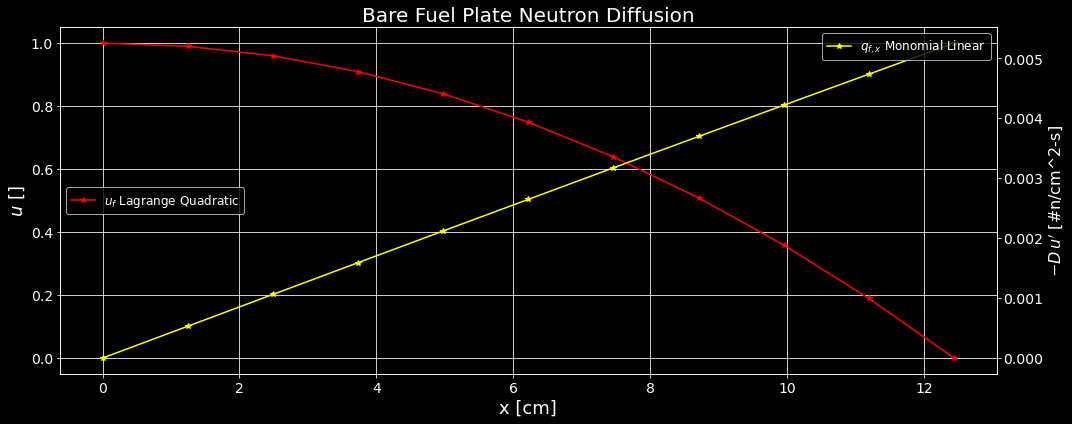

In [11]:
'''Show FEM Solution'''

import pandas as pd
df1 = pd.read_csv('output_omega_1_0002.csv')
    
plot_solution(df1=df1, title='Bare Fuel Plate Neutron Diffusion',
              u1_legend=r'$u_f$ Lagrange Quadratic',
              u1_flux_legend=r'$q_{f,x}$ Monomial Linear',
              x_scale=1/unit.cm,
              xlabel='x [cm]', normalize_y1=True, y1label=r'$u$ []', 
              y2_scale=1/unit.cm**2, y2label=r"$-D\,u'$ [#n/cm^2-s]")

#### [Test 2: Fuel plate with reflector](#toc)<a id="1dsolofueldirichletrobin"></a>

In [12]:
'''Parameters'''
diff_coeff_reflector = 1.0
diff_length = 94.7*unit.cm

x_b = plate_thickness + 3*diff_length

In [13]:
'''FEM Solution'''
n_felem_reflector = 6

order = 'second'
flux_order = 'first'

fdp_full = True
n_plot_pts_reflector = 2*n_felem_reflector + 1

In [14]:
'''Input file'''
write_input_file(with_reflector=True, dirichlet_bc=True)
!cat input.hit

[Problem]
  type = FEProblem
  coord_type = XYZ
[]
[Mesh]
  [omega1]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.0
    xmax = 0.125
    nx = 5
    elem_type = edge3
  []
  [omega2]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.125
    xmax = 3.091
    nx = 6
    elem_type = edge3
  []
  [omega]
    type = StitchedMeshGenerator
    inputs = 'omega1 omega2'
    stitch_boundaries_pairs = 'right left'
    clear_stitched_boundary_ids = true
  []
  [mod1]
    type = SubdomainBoundingBoxGenerator
    input = omega
    block_id = 1
    block_name = omega_1
    bottom_left = '0.0 0 0'
    top_right = '0.125 1 0'
  []
  [mod2]
    type = SubdomainBoundingBoxGenerator
    input = mod1
    block_id = 2
    block_name = omega_2
    bottom_left = '0.125 0 0'
    top_right = '3.091 1 0'
  []
  [mod3]
    type = SideSetsBetweenSubdomainsGenerator
    input = mod2
    primary_block = omega_1
    paired_block = omega_2
    new_boundary = interface_12
  []
  [mod4]
    type = 

In [15]:
'''Run MOOSE App'''
!./fuel_plate-opt -i input.hit


In ReplicatedMesh::stitch_meshes:
This mesh has 1 nodes on boundary 1.
Other mesh has 1 nodes on boundary 0.
Minimum edge length on both surfaces is 0.025.
In ReplicatedMesh::stitch_meshes:
Found 1 matching nodes.

Framework Information:
MOOSE Version:           git commit 38d37b938c on 2021-10-22
LibMesh Version:         aebb5a5c0e1f6d8cf523a720e19f70a6d17c0236
PETSc Version:           3.16.0
SLEPc Version:           3.16.0
Current Time:            Sun Dec 19 00:31:09 2021
Executable Timestamp:    Sat Dec 18 20:05:04 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   23
  Elems:                   11
  Num Subdomains:          2

Nonlinear System:
  Num DOFs:                24
  Num Local DOFs:          24
  Variables:               "uFuel" "uReflector" 
  Finite Element Types:    "LAGRANGE" "LAGRANGE" 
  Approximation Orders:    

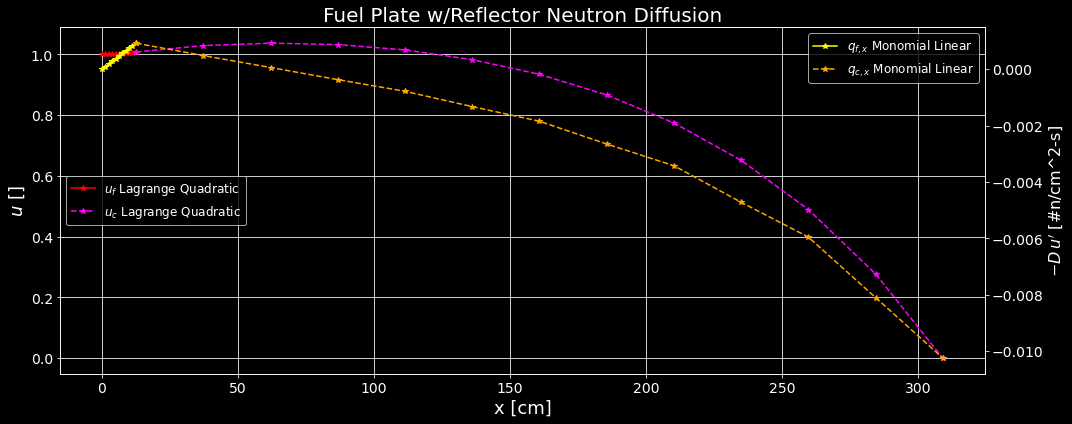

In [16]:
'''Show FEM Solution'''

import pandas as pd
df1 = pd.read_csv('output_omega_1_0002.csv')
df2 = pd.read_csv('output_omega_2_0002.csv')
    
plot_solution(df1=df1, df2=df2, title='Fuel Plate w/Reflector Neutron Diffusion',
              u1_legend=r'$u_f$ Lagrange Quadratic',
              u1_flux_legend=r'$q_{f,x}$ Monomial Linear',
              u2_legend=r'$u_c$ Lagrange Quadratic',
              u2_flux_legend=r'$q_{c,x}$ Monomial Linear',
              x_scale=1/unit.cm,
              xlabel='x [cm]', normalize_y1=True, y1label=r'$u$ []', 
              y2_scale=1/unit.cm**2, y2label=r"$-D\,u'$ [#n/cm^2-s]")

## [2-D Results and Analysis](#toc)<a id="ranalysis"></a>

In [17]:
'''Parameters'''

'Parameters'

In [18]:
'''FEM Parameters'''

'FEM Parameters'

In [19]:
'''Input file mod'''

'Input file mod'

In [20]:
'''Run MOOSE App'''

'Run MOOSE App'

In [21]:
'''Show 2D solution'''

'Show 2D solution'

## [Conclusions](#toc)<a id="conclusions"></a>

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [4] author, [reference]()